In [4]:
# This example is from Kaggle's recent Covid19 challenges
# David Lopez
# Data Source:
# COVID19 Global Forecasting (Week 4)
# Forecast daily COVID-19 spread in regions around world
# https://www.kaggle.com/c/covid19-global-forecasting-week-4/data
# This is a forecasting exercise. Goal is to get the most accurate Detected cases/Deaths prediction.
# There's data from countries all over the world.
# Training data is fron 2020-01 to 2020-03. Test data is 2020-04.

In [5]:
# Modules
import pandas as pd
import matplotlib.pyplot as mplot


In [6]:
# Global Vars
source_path='C:/Users/dalop/Documents/dat/covid_forecast'

In [7]:
# Loading Train Data (train.csv)
df_c_train= pd.read_csv('{}/train.csv'.format(source_path))
#print(df_c_train)

In [8]:
# EDA

# Summary statistics
display(df_c_train.describe())

,Id,ConfirmedCases,Fatalities
count,31300.000000,31300.000000,31300.000000
mean,17834.500000,2352.257987,149.295304
std,10300.658578,13975.949676,1326.507243
min,1.000000,0.000000,0.000000
25%,8917.750000,0.000000,0.000000
50%,17834.500000,8.000000,0.000000
75%,26751.250000,288.000000,3.000000
max,35668.000000,304372.000000,27967.000000


In [9]:
# Basic visualizations
df_confirmed_dead= df_c_train.groupby(['Date']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']})
display(df_confirmed_dead)

,ConfirmedCases,Fatalities
,sum,sum
Date,,
2020-01-22,554.0,17.0
2020-01-23,653.0,18.0
2020-01-24,939.0,26.0
2020-01-25,1432.0,42.0
2020-01-26,2113.0,56.0
2020-01-27,2922.0,82.0
2020-01-28,5573.0,131.0
2020-01-29,6161.0,133.0


In [10]:
df_confirmed_dead.columns

MultiIndex(levels=[['ConfirmedCases', 'Fatalities'], ['sum']],
           codes=[[0, 1], [0, 0]])

Text(0.5, 1.0, 'Global dead')

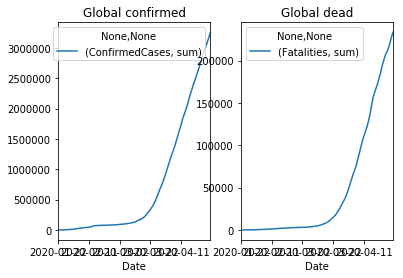

In [11]:
fig01,(ax1,ax2)= mplot.subplots(1,2)
df_confirmed_dead[['ConfirmedCases']].plot(ax=ax1)
df_confirmed_dead[['Fatalities']].plot(ax=ax2)
ax1.set_title('Global confirmed')
ax2.set_title('Global dead')

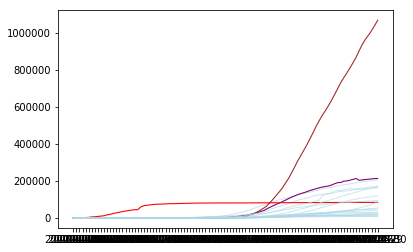

In [80]:
# Confirmed, top N
top_n=20
df_top_n= df_c_train[df_c_train['Date']=='2020-03-31'].groupby(['Country_Region']).agg({'ConfirmedCases':['max']}).groupby(['Country_Region']).agg('sum').sort_values(by=('ConfirmedCases','max'),ascending=False).head(top_n)
#display(df_top_n)
top_n_countries= df_top_n.index.values
# Grouped by country Only
df_train_country= df_c_train.groupby(['Date','Country_Region']).agg({'ConfirmedCases':['sum']}).reset_index()
#df_train_country.columns
#display(df_train_country)
df_train_top_n= df_train_country[df_train_country['Country_Region'].isin(top_n_countries)][['Date','Country_Region','ConfirmedCases']]
#display(df_train_top_n[df_train_top_n['Date']=='2020-03-31'].sort_values(by=('ConfirmedCases','sum'),ascending=False))
# Specific color for some countries
dict_country= {'China':'red','Mexico':'green','Spain':'purple','US':'brown'}
mplot.figure()
for country in top_n_countries:
    tmp_df= df_train_top_n[df_train_top_n['Country_Region']==country]
    #print('{} {}'.format(country,tmp_df[tmp_df['Date']=='2020-03-31']['ConfirmedCases']))
    if dict_country.get(country)== None:
        mplot.plot(tmp_df['Date'],tmp_df['ConfirmedCases'],marker='',color='lightblue',linewidth=.9,alpha=.7)
    else:
        mplot.plot(tmp_df['Date'],tmp_df['ConfirmedCases'],marker='',color=dict_country.get(country),linewidth=1.1,alpha=1)
    #mplot.plot

In [86]:
# Right now, I'll perform these exercises on country-level data
# So I'll aggretate and save the data
df_output= df_c_train.groupby(['Date','Country_Region']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']}).reset_index()
df_output.to_csv('{}/train_country_level.csv'.format(source_path),index=False)
